In [185]:

df = pd.read_json(r"D:\NLP_Datasets\complaints_tickets.json")
df.head(4)


,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code':..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', ..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code':..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code':..."


In [100]:
df.shape

(78313, 5)

In [101]:
source_df = pd.json_normalize(df['_source'])
source_df.head(2)

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt n...,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about...,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XX...,Didn't receive enough info...,Consent provided


In [102]:
df = pd.concat([df.drop('_source',axis=1),source_df],axis=1) # ,axis=1 will make side by side column while doing concatenation of 2 dataframes
df.head(2)


,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0,None,90301,3211475,Attempts to collect debt n...,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0,Servicemember,319XX,3229299,Written notification about...,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XX...,Didn't receive enough info...,Consent provided


In [103]:
df.columns

Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [104]:
df.shape


(78313, 22)

In [105]:
df.dtypes

_index                       object
_type                        object
_id                           int64
_score                        int64
tags                         object
zip_code                     object
complaint_id                 object
issue                        object
date_received                object
state                        object
consumer_disputed            object
product                      object
company_response             object
company                      object
submitted_via                object
date_sent_to_company         object
company_public_response      object
sub_product                  object
timely                       object
complaint_what_happened      object
sub_issue                    object
consumer_consent_provided    object
dtype: object

In [106]:
df.isnull().sum()

_index                           0
_type                            0
_id                              0
_score                           0
tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint_what_happened          0
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64

## 1. Data Preparation


In [107]:
prep_df = df[['product','sub_product','complaint_what_happened']]
prep_df.head(3)

,product,sub_product,complaint_what_happened
0,Debt collection,Credit card debt,
1,Debt collection,Credit card debt,Good morning my name is XX...
2,Credit card or prepaid card,General-purpose credit car...,I upgraded my XXXX XXXX ca...


In [108]:
## Merging product and sub_product field as both are similar and helps in deciding the topic after Modelling with NMF or LDA Technique

prep_df['category'] = prep_df['product'] +' '+prep_df['sub_product']
prep_df.head(2)

,product,sub_product,complaint_what_happened,category
0,Debt collection,Credit card debt,,Debt collection Credit car...
1,Debt collection,Credit card debt,Good morning my name is XX...,Debt collection Credit car...


In [109]:
prep_df = prep_df.rename(columns={'complaint_what_happened':'Complaint_Text'})

In [110]:
prep_df.head(2)

,product,sub_product,Complaint_Text,category
0,Debt collection,Credit card debt,,Debt collection Credit car...
1,Debt collection,Credit card debt,Good morning my name is XX...,Debt collection Credit car...


In [111]:
prep_df = prep_df[['category','Complaint_Text']]
prep_df.head(2)

,category,Complaint_Text
0,Debt collection Credit car...,
1,Debt collection Credit car...,Good morning my name is XX...


In [112]:
# Checking Non Complaint Text data

prep_df['Complaint_Text'].isnull().sum()

0

In [113]:
# lets check the empty string complaints

len(prep_df[prep_df['Complaint_Text'] ==''])

57241

In [114]:
## Taking non empty data 

prep_df = prep_df[prep_df['Complaint_Text'] !='']
prep_df.shape

(21072, 2)

## 2. Text Pre Processing

### ## Data Preparation is completed so now lets make pre processing on final data

In [115]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (only run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Precompile the regex for punctuation removal (done once)
punctuation_regex = re.compile(f"[{string.punctuation}]")

# Preload stopwords and lemmatizer (done once)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text, min_word_length=3):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove punctuation and special characters
    text = punctuation_regex.sub("", text)

    # 3. Tokenize text (split into words)
    tokens = word_tokenize(text)

    # 4. Filter out stopwords and short words, and lemmatize in one step
    tokens = [
        lemmatizer.lemmatize(word) 
        for word in tokens 
        if word not in stop_words and len(word) >= min_word_length
    ]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
prep_df['lemmatized_text'] = prep_df['Complaint_Text'].apply(lambda col: clean_text(col))
prep_df.head(4)

,category,Complaint_Text,lemmatized_text
1,Debt collection Credit car...,Good morning my name is XX...,good morning name xxxx xxx...
2,Credit card or prepaid car...,I upgraded my XXXX XXXX ca...,upgraded xxxx xxxx card xx...
10,"Credit reporting, credit r...",Chase Card was reported on...,chase card reported xxxx20...
11,"Credit reporting, credit r...","On XX/XX/2018, while tryin...",xxxx2018 trying book xxxx ...


In [117]:
final_df = prep_df[['Complaint_Text','lemmatized_text']]
final_df.shape

(21072, 2)

## extracting POS (Part of Speech) tags fron text data using nltk library

### Common POS tags include:

**DT**: Determiner (e.g., "the")

JJ: Adjective (e.g., "quick", "brown")

NN: Noun, singular (e.g., "fox", "dog")

VBZ: Verb, 3rd person singular present (e.g., "jumps")

IN: Preposition (e.g., "over")

In [118]:
import spacy
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Load SpaCy's English model (only done once)
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [119]:
from nltk import pos_tag

# Predefined set of noun POS tags for efficiency
noun_tags = {'NN'}

def extract_pos_tag(txt):
    tokens = word_tokenize(txt)
    pos_tags = pos_tag(tokens)

    nouns = [word for word,tag in pos_tags if tag in noun_tags]

    return ' '.join(nouns)
    



In [120]:

# Alternative way using Spacy for large corpus 

import spacy


def extract_pos_tag_spacy(txt:str):

    # Process the text with spacy
    doc = nlp(text=txt)

    # Extract and return all nouns (proper nouns, singular/plural)
    nouns = [token.text for token in doc if token.pos_ in {'NOUN','PROPN'}]

    return ' '.join(nouns)


In [121]:
extract_pos_tag("Hello are you doing man")

'man'

In [122]:
final_df['POS_Removed'] = final_df['lemmatized_text'].apply(lambda col: extract_pos_tag(col))
final_df.head(3)

,Complaint_Text,lemmatized_text,POS_Removed
1,Good morning my name is XX...,good morning name xxxx xxx...,morning name appreciate ch...
2,I upgraded my XXXX XXXX ca...,upgraded xxxx xxxx card xx...,xxxx card agent date agent...
10,Chase Card was reported on...,chase card reported xxxx20...,chase card application ide...


## 3. Exploratory Data Analysis (EDA)

In [123]:
char_len =  [len(sentence) for sentence in final_df['POS_Removed'] ]
char_len[:10]

[167, 84, 73, 373, 182, 7, 523, 555, 1119, 45]

Text(0, 0.5, 'No. of Complaints')

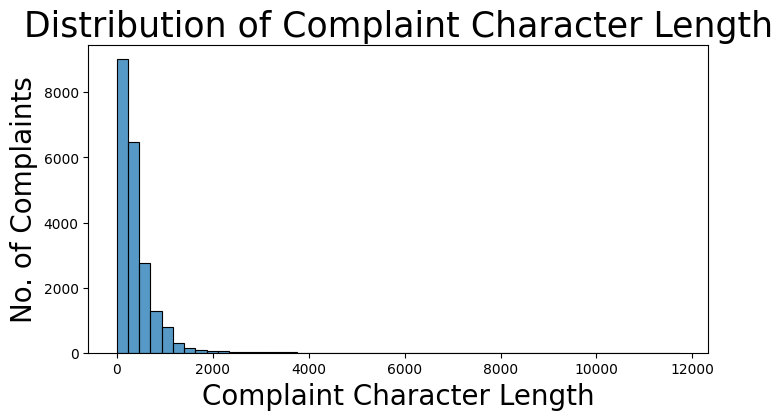

In [124]:

## Write your code here to visualise the data according to the 'Complaint' character length

plt.figure(figsize=(8,4))
sns.histplot(data=char_len,bins=50)
plt.title('Distribution of Complaint Character Length', fontsize=25)
plt.xlabel('Complaint Character Length',size=20)
plt.ylabel('No. of Complaints',size=20)

### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text

In [125]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def get_top_n_bigram(txt,ngram=1,top=None):
    
    vec = CountVectorizer(ngram_range=(ngram,ngram),stop_words='english').fit(txt)
    
    bag_of_words = vec.transform(txt)
    
    sum_words = bag_of_words.sum(axis=0)

    word_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]

    word_freq = sorted(word_freq,key= lambda x: x[1],reverse=True)

    # Return the top N words (if 'top' is specified)
    if top is not None:
        return word_freq[:top]
    else:
        return word_freq

In [126]:
# Example usage:
text = ["This is a sample text", "This is another sample text for bigram analysis"]
#txt =['morning', 'name', 'appreciate', 'chase', 'bank', 'cardmember', 'service', 'chase', 'debt', 'verification']
#text = final_df['POS_Removed'].values[0]
top_bigrams = get_top_n_bigram(text, ngram=2, top=5)
print(top_bigrams)

[('sample text', 2), ('text bigram', 1), ('bigram analysis', 1)]


In [127]:
txt = ['typing','examination','bank','Making','transaction','cooking','preparation']
vec = CountVectorizer(ngram_range=(1,1),stop_words='english').fit(txt)
bow  = vec.transform(txt)
vec.vocabulary_.items()

dict_items([('typing', 6), ('examination', 2), ('bank', 0), ('making', 3), ('transaction', 5), ('cooking', 1), ('preparation', 4)])

In [128]:
#pd.set_option('display.max_colwidth', None) # to print complete output of the column
pd.set_option('display.max_colwidth', 30) 
final_df['POS_Removed']

1        morning name appreciate ch...
2        xxxx card agent date agent...
10       chase card application ide...
11       book ticket offer ticket c...
14       son check deposit chase ac...
                     ...              
78303    chase card customer decade...
78309    wednesday chas xxxx credit...
78310    pay risk consumer chase ba...
78311    flawless credit chase cred...
78312    year account bank order li...
Name: POS_Removed, Length: 21072, dtype: object

In [169]:
t ='hi hello xxxx  where are xxxx '
t1='xxxx cardxxxxxxx agent date agent.'
t1.replace('xxxx','')

' cardxxx agent date agent.'

In [130]:
### Removing xxxx to clean the data
final_df['POS_Removed'] = final_df['POS_Removed'].replace('xxxx','')

In [131]:
top_30_unigrams = get_top_n_bigram(final_df['POS_Removed'], ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(final_df['POS_Removed'], ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(final_df['POS_Removed'], ngram=3, top=30)

In [132]:
top_30_unigrams[:3]

[('chase', 53407), ('account', 45322), ('credit', 33100)]

### Find the top 40 words by frequency among all the articles after processing the text.

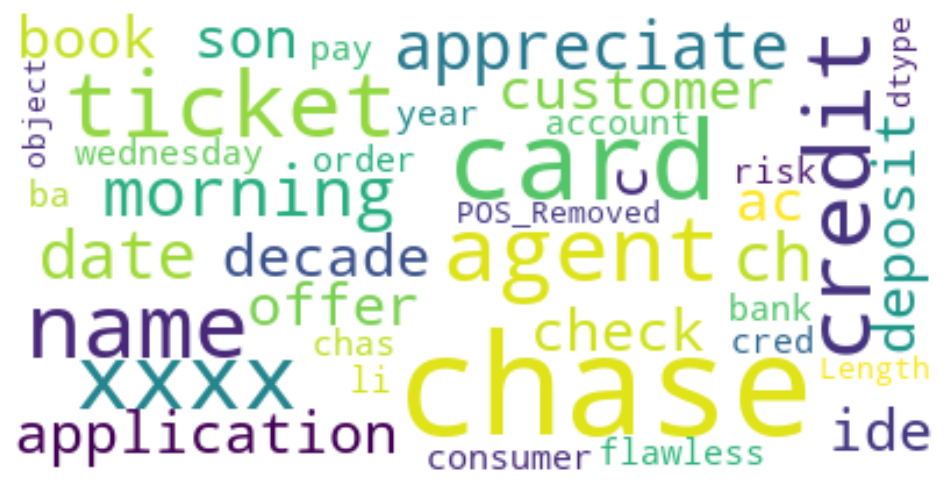

In [133]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=40, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(final_df['POS_Removed']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### The top words as observed from the word cloud are

### credit, card, bank, account, chase etc.,

In [134]:
unigram_df = pd.DataFrame(top_30_unigrams,columns=['word','count'])
unigram_df.head(4)

,word,count
0,chase,53407
1,account,45322
2,credit,33100
3,bank,28242


### Plotting top 30 unigram words

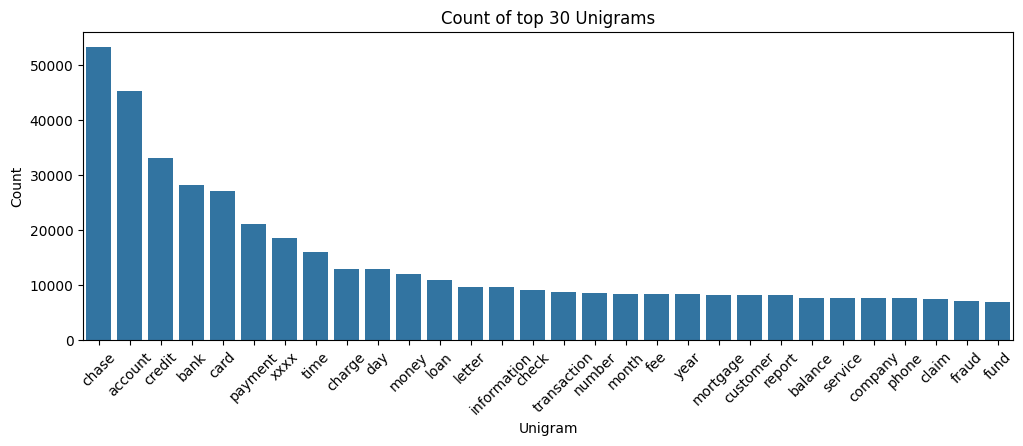

In [135]:
plt.figure(figsize=(12,4))
sns.barplot(data=unigram_df,x=unigram_df['word'],y=unigram_df['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

## Similar to above unigram , we can do plot for bigram and trigram and analyze the content

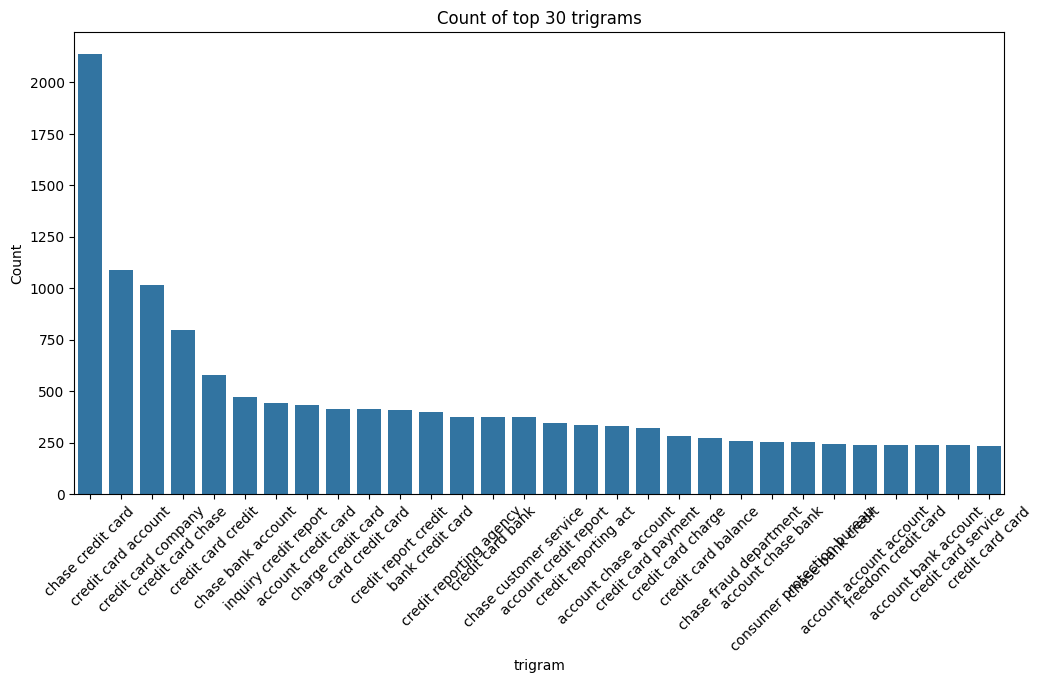

In [136]:
trigram_df = pd.DataFrame(top_30_trigrams,columns=['word','count'])
plt.figure(figsize=(12,6))
sns.barplot(x=trigram_df['word'],y=trigram_df['count'])
plt.xticks(rotation=45)
plt.xlabel("trigram")
plt.ylabel("Count")
plt.title("Count of top 30 trigrams")
plt.show()

## 4. Feature Extraction

#### Convert the raw texts to a matrix of TF-IDF features

#### max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

#### min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [137]:
tfdif_vec = TfidfVectorizer(min_df=2,max_df=0.95,stop_words="english")

In [138]:
## Create a document term matrix using fit_transform
dtm = tfdif_vec.fit_transform(final_df['POS_Removed'])

In [139]:
tfdif_vec.get_feature_names_out()

array(['aarp', 'abandonment', 'abatement', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [140]:
dtm_dense = dtm.toarray()
dtm_dense[:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## 5. Topic Modelling using NMF¶
#### Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

### In this task you have to perform the following:

#### Find the best number of clusters
#### Apply the best number to create word clusters
#### Inspect & validate the correction of each cluster wrt the complaints
#### Correct the labels if needed
#### Map the clusters to topics/cluster names

In [141]:
## Manual Topic Modeling¶
## You need to do take the trial & error approach to find the best num of topics for your NMF model.

## The only parameter that is required is the number of components i.e. the number of topics we want. 
# This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

from sklearn.decomposition import NMF

#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [142]:
nmf_model.fit(dtm)


NMF(n_components=5, random_state=40)

In [143]:

len(tfdif_vec.get_feature_names_out())

6974

In [179]:
topic_single = nmf_model.components_[0]
topic_single.argsort()[:20]

array([   0, 4521, 1765, 4518, 1767, 1768, 1769, 4523, 1770, 4515, 4514,
       4510, 4507, 4506, 1780, 4517, 1757, 4534, 4535, 4571], dtype=int64)

In [173]:
t ='hi hello xxxx  where are xxxx '
t1='xxxx cardxxxxxxx agent date agent.'
t1.replace('xxxx','')

' cardxxx agent date agent.'

In [180]:
# Print the top word of a sample component
topic_single = nmf_model.components_[0]
topic_single.argsort()
top_word_index = topic_single.argsort()[-20:]
for index in top_word_index:
    print(tfdif_vec.get_feature_names_out()[index])

fraud
access
fee
time
claim
customer
transfer
xxxx
transaction
business
number
branch
day
deposit
fund
chase
money
check
bank
account


In [181]:

#Print the Top20 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'TOP 20 WORDS FOR TOPIC #{index}')
    print([tfdif_vec.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print('\n')

TOP 20 WORDS FOR TOPIC #0
['fraud', 'access', 'fee', 'time', 'claim', 'customer', 'transfer', 'xxxx', 'transaction', 'business', 'number', 'branch', 'day', 'deposit', 'fund', 'chase', 'money', 'check', 'bank', 'account']


TOP 20 WORDS FOR TOPIC #1
['xxxx', 'identity', 'reason', 'reporting', 'year', 'letter', 'balance', 'application', 'information', 'debt', 'limit', 'bureau', 'company', 'score', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


TOP 20 WORDS FOR TOPIC #2
['process', 'tax', 'information', 'debt', 'document', 'sale', 'foreclosure', 'house', 'bank', 'time', 'letter', 'rate', 'xxxx', 'year', 'property', 'modification', 'chase', 'home', 'mortgage', 'loan']


TOP 20 WORDS FOR TOPIC #3
['department', 'customer', 'day', 'company', 'refund', 'phone', 'statement', 'time', 'service', 'xxxx', 'purchase', 'merchant', 'fee', 'claim', 'fraud', 'dispute', 'transaction', 'card', 'chase', 'charge']


TOP 20 WORDS FOR TOPIC #4
['error', 'plan', 'history', 'car', 'mortgage', 'ye

In [146]:

#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_result = nmf_model.transform(dtm)
topic_result[0].round(2)
topic_result[0].argmax()
topic_result.argmax(axis=1)
     

array([0, 3, 1, ..., 3, 4, 4], dtype=int64)

In [147]:

# Create a new 'Topic' column and assign the best topic to each of the complaints

final_df['topic'] = topic_result.argmax(axis=1)


In [148]:
final_df.shape

(21072, 4)

In [149]:
final_df.head(5)

,Complaint_Text,lemmatized_text,POS_Removed,topic
1,Good morning my name is XX...,good morning name xxxx xxx...,morning name appreciate ch...,0
2,I upgraded my XXXX XXXX ca...,upgraded xxxx xxxx card xx...,xxxx card agent date agent...,3
10,Chase Card was reported on...,chase card reported xxxx20...,chase card application ide...,1
11,"On XX/XX/2018, while tryin...",xxxx2018 trying book xxxx ...,book ticket offer ticket c...,1
14,my grand son give me check...,grand son give check 16000...,son check deposit chase ac...,0


## Mapping Relevant Topic to Each Complaint

In [150]:
#Create the dictionary of Topic names and Topics
topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

#Replace Topics with Topic Names
final_df['topic'] = final_df['topic'].map(topic_mapping)

In [151]:
final_df.head(5)

,Complaint_Text,lemmatized_text,POS_Removed,topic
1,Good morning my name is XX...,good morning name xxxx xxx...,morning name appreciate ch...,Bank Account services
2,I upgraded my XXXX XXXX ca...,upgraded xxxx xxxx card xx...,xxxx card agent date agent...,Theft/Dispute Reporting
10,Chase Card was reported on...,chase card reported xxxx20...,chase card application ide...,Credit card or prepaid card
11,"On XX/XX/2018, while tryin...",xxxx2018 trying book xxxx ...,book ticket offer ticket c...,Credit card or prepaid card
14,my grand son give me check...,grand son give check 16000...,son check deposit chase ac...,Bank Account services


<Axes: xlabel='topic', ylabel='count'>

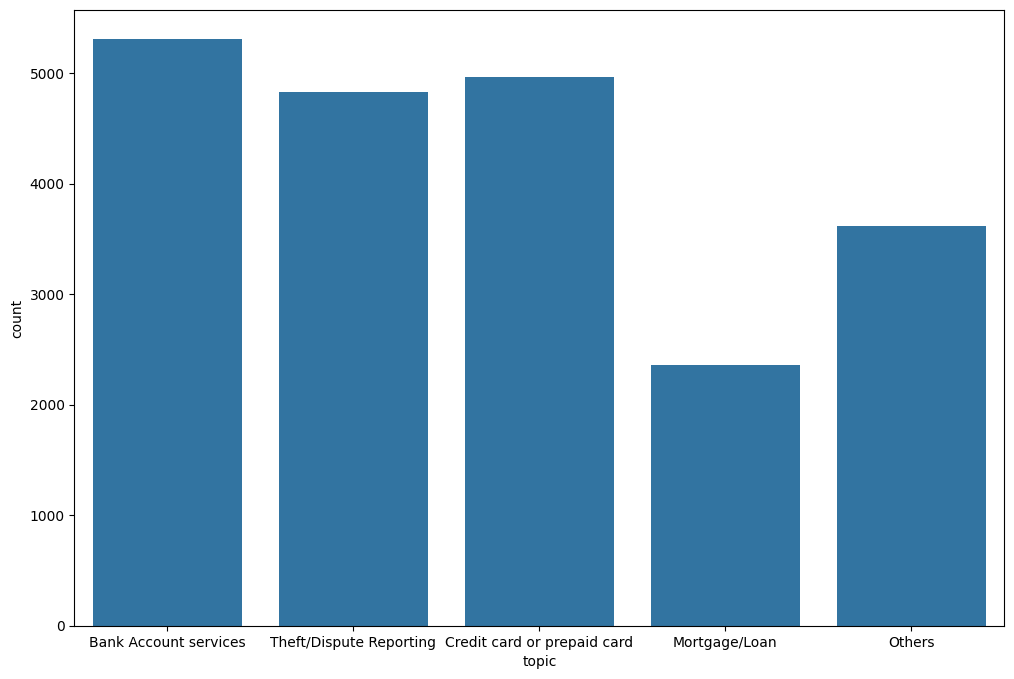

In [152]:
plt.figure(figsize=(12,8))
sns.countplot(data=final_df,x='topic')

## Build the Supervised Model for making a prediction for new complaint


In [186]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

training_data = final_df[['lemmatized_text','topic']]
type(training_data)

pandas.core.frame.DataFrame

In [187]:
training_data.head(4)

,lemmatized_text,topic
1,good morning name xxxx xxx...,Bank Account services
2,upgraded xxxx xxxx card xx...,Theft/Dispute Reporting
10,chase card reported xxxx20...,Credit card or prepaid card
11,xxxx2018 trying book xxxx ...,Credit card or prepaid card


In [188]:

training_data['complaint_text'] = training_data['lemmatized_text'].str.replace('xxxx','')
training_data.head()

,lemmatized_text,topic,complaint_text
1,good morning name xxxx xxx...,Bank Account services,good morning name apprec...
2,upgraded xxxx xxxx card xx...,Theft/Dispute Reporting,upgraded card 2018 told ...
10,chase card reported xxxx20...,Credit card or prepaid card,chase card reported 2019 h...
11,xxxx2018 trying book xxxx ...,Credit card or prepaid card,2018 trying book ticket ...
14,grand son give check 16000...,Bank Account services,grand son give check 16000...


In [189]:
training_data_df = training_data.drop(columns=['lemmatized_text'],axis=1)

In [190]:
training_data_df.head(4)

,topic,complaint_text
1,Bank Account services,good morning name apprec...
2,Theft/Dispute Reporting,upgraded card 2018 told ...
10,Credit card or prepaid card,chase card reported 2019 h...
11,Credit card or prepaid card,2018 trying book ticket ...


In [193]:
training_data_df['topic'].value_counts()

topic
Bank Account services          5307
Credit card or prepaid card    4965
Theft/Dispute Reporting        4825
Others                         3613
Mortgage/Loan                  2362
Name: count, dtype: int64

## Data Pre Processing

In [194]:
## Reverse topic names mapping for supervised learning

reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
#Replace Topics with Topic Names
training_data_df['topic'] = training_data_df['topic'].map(reverse_topic_mapping)
training_data_df.head()

,topic,complaint_text
1,0,good morning name apprec...
2,3,upgraded card 2018 told ...
10,1,chase card reported 2019 h...
11,1,2018 trying book ticket ...
14,0,grand son give check 16000...


### transform the word vector into a TF-IDF representation

In [204]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Step 1: Create the CountVectorizer instance to get word counts
count_vector = CountVectorizer()

# Step 2: Transform the text data into word counts (document-term matrix)
X_train_count = count_vector.fit_transform(training_data_df['complaint_text'])

# Step 3: Create the TfidfTransformer instance to convert word counts to TF-IDF
tfidf_transformer = TfidfTransformer()

# Step 4: Transform the word count matrix into the TF-IDF representation
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

#  print the shape of the TF-IDF matrix to see its size
print(X_train_tfidf.shape)


(21072, 32406)


In [205]:
import pickle

# Saving the vocabulary of the CountVectorizer to disk for later usage
pickle.dump(count_vector.vocabulary_, open(r'D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\count_vector.pkl', 'wb'))


In [273]:
# Loading the saved vocabulary back into the script
vocabulary = pickle.load(open(r'D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\count_vector.pkl', 'rb'))

# Print the loaded vocabulary
print(type(vocabulary))

print(list(vocabulary.keys())[:10])

<class 'dict'>
['good', 'morning', 'name', 'appreciate', 'could', 'help', 'put', 'stop', 'chase', 'bank']


## tfidf_transformer: This is the fitted TF-IDF model (from TfidfTransformer), which is responsible for transforming the word counts into TF-IDF scores

In [207]:
import pickle

# Saving the TfidfTransformer model to disk for later usage
pickle.dump(tfidf_transformer, open(r'D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\tfdif.pkl', 'wb'))


## Example: Loading tfdif model for New Data

In [208]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# Step 1: Load the previously saved TfidfTransformer
loaded_tfidf_transformer = pickle.load(open(r'D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\tfdif.pkl', 'rb'))

# Step 2: Create a new CountVectorizer with the same vocabulary as before
count_vector = CountVectorizer(vocabulary=pickle.load(open(r'D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\count_vector.pkl', 'rb')))

# Step 3: Fit and transform new data (assuming new data is in a list of texts called `new_data`)
new_data = ["This is a new complaint text.", "Another new complaint."]

# Step 4: Transform the new data into the document-term matrix
new_data_count = count_vector.transform(new_data)

# Step 5: Apply the loaded TfidfTransformer to transform the new data
X_new_tfidf = loaded_tfidf_transformer.transform(new_data_count)

# X_new_tfidf now contains the TF-IDF representation of the new data
print(X_new_tfidf.shape)


(2, 32406)


In [210]:
training_data_df.head(3)

,topic,complaint_text
1,0,good morning name apprec...
2,3,upgraded card 2018 told ...
10,1,chase card reported 2019 h...


In [211]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data_df['topic'], test_size=0.20, random_state=42)


print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (16857, 32406)
y_train Shape: (16857,)
X_test Shape: (4215, 32406)
y_test Shape: (4215,)


## Model Building & Evaluation

In [212]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [225]:
# Create a function to evaluate models
def model_eval(y_test, y_pred, model_name):

    # print classification report of classifier
    print(f"CLASSIFICATION REPORT for {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"]))

    # plot confusion matrix of the classifier
    plt.figure(figsize=(6,4))
    plt.title(f"CONFUSION MATRIX for {model_name}\n")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="Greens", fmt='d',
                xticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"], 
                yticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"])
    
    plt.show()

    return

## 1. Naive Bayes

In [216]:
from sklearn.naive_bayes import MultinomialNB
model_name = "Naive Bayes"
nb = MultinomialNB()
nb.fit(X_train,y_train)


MultinomialNB()

CLASSIFICATION REPORT for Naive Bayes

                             precision    recall  f1-score   support

      Bank Account services       0.68      0.89      0.77      1082
Credit card or prepaid card       0.72      0.78      0.75      1031
                     Others       0.84      0.80      0.82       679
    Theft/Dispute Reporting       0.72      0.78      0.75       944
              Mortgage/Loan       1.00      0.06      0.12       479

                   accuracy                           0.73      4215
                  macro avg       0.79      0.66      0.64      4215
               weighted avg       0.76      0.73      0.69      4215



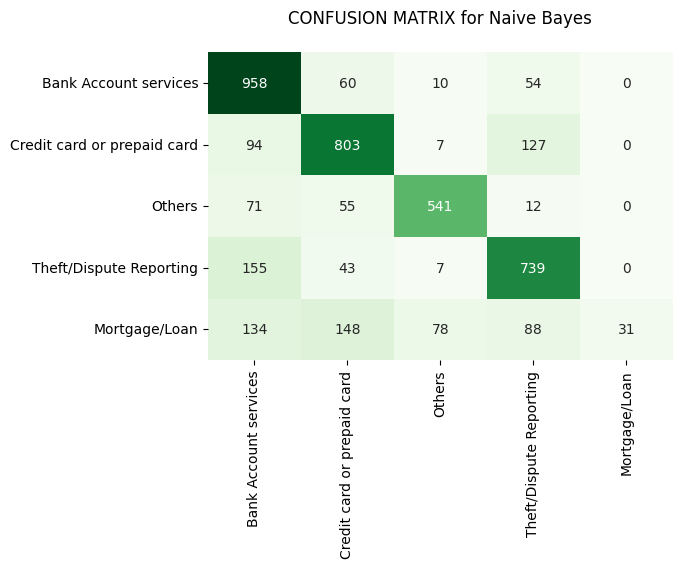

In [226]:
y_pred_nb = nb.predict(X_test)
model_eval(y_test=y_test,y_pred=y_pred_nb,model_name="Naive Bayes")

## 2. Logistic Regression

CLASSIFICATION REPORT for Logistic Regression

                             precision    recall  f1-score   support

      Bank Account services       0.93      0.95      0.94      1082
Credit card or prepaid card       0.95      0.96      0.95      1031
                     Others       0.96      0.95      0.95       679
    Theft/Dispute Reporting       0.92      0.94      0.93       944
              Mortgage/Loan       0.98      0.89      0.93       479

                   accuracy                           0.94      4215
                  macro avg       0.95      0.94      0.94      4215
               weighted avg       0.94      0.94      0.94      4215



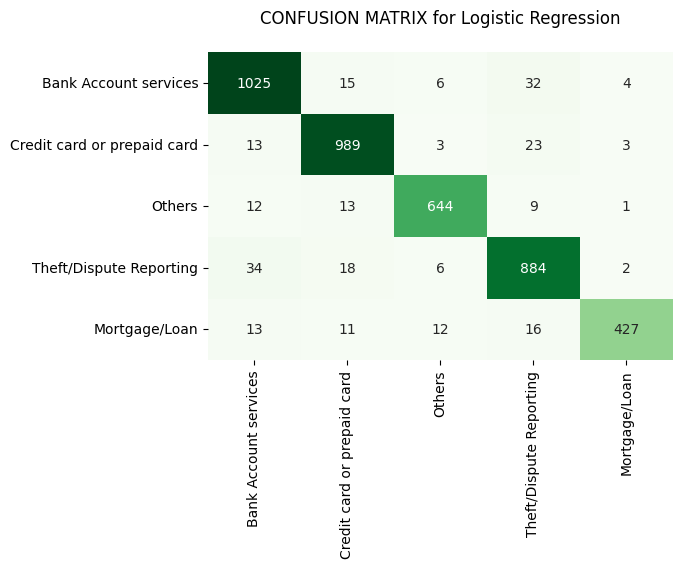

In [227]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression().fit(X_train,y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
model_eval(y_test=y_test,y_pred=y_pred_log_reg,model_name="Logistic Regression")

## 3. Decision Tree

CLASSIFICATION REPORT for Decision Tree

                             precision    recall  f1-score   support

      Bank Account services       0.84      0.84      0.84      1082
Credit card or prepaid card       0.85      0.82      0.84      1031
                     Others       0.83      0.85      0.84       679
    Theft/Dispute Reporting       0.76      0.76      0.76       944
              Mortgage/Loan       0.81      0.81      0.81       479

                   accuracy                           0.82      4215
                  macro avg       0.82      0.82      0.82      4215
               weighted avg       0.82      0.82      0.82      4215



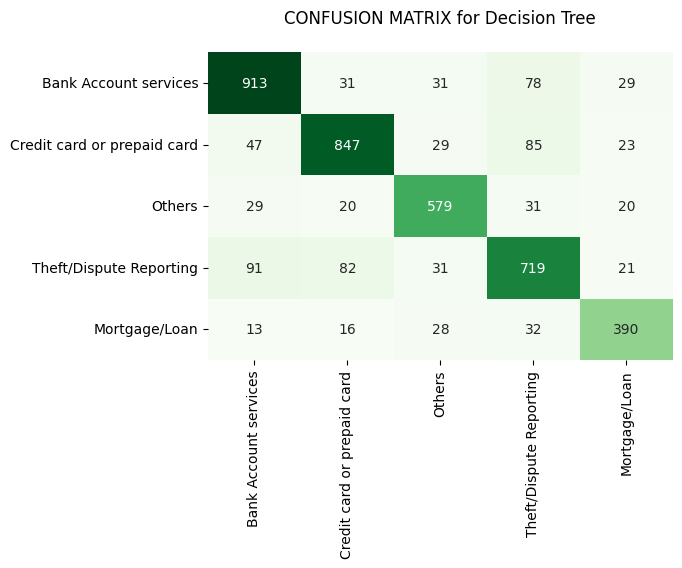

In [231]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

model_eval(y_test=y_test,y_pred=y_pred_dt,model_name="Decision Tree")

## Model 4: Random Forest

CLASSIFICATION REPORT for Random Forest

                             precision    recall  f1-score   support

      Bank Account services       0.82      0.91      0.87      1082
Credit card or prepaid card       0.84      0.88      0.86      1031
                     Others       0.86      0.91      0.88       679
    Theft/Dispute Reporting       0.82      0.85      0.84       944
              Mortgage/Loan       0.95      0.46      0.62       479

                   accuracy                           0.84      4215
                  macro avg       0.86      0.80      0.81      4215
               weighted avg       0.85      0.84      0.83      4215



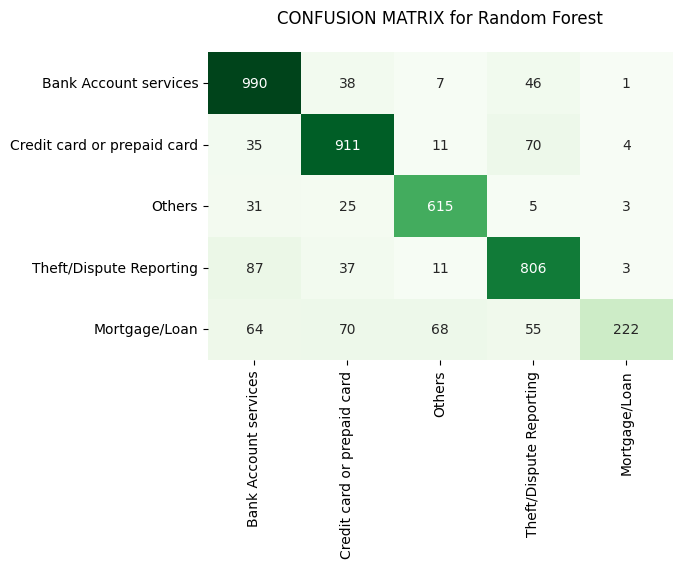

In [233]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier().fit(X_train,y_train)
y_pred_rfc = rfc_model.predict(X_test)

model_eval(y_test=y_test,y_pred=y_pred_rfc,model_name="Random Forest")

### Out Of above 4 Model, Logistic regression had given better result in metrics so lets save this logistic regression model and do prediction here

In [235]:
## Saving logistic regression model
import pickle

pickle.dump(log_reg_model,open(r"D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\log_reg_model.pkl","wb"))


## Prediction


In [240]:
# raw complaint text
test_complaint= 'I tried to make a transaction at a supermarket retail store, using my chase \
debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.'

# Lets first transform raw text to get word count and then to tf-idf

test_word_count = count_vector.transform([test_complaint])

test_tfdif = tfidf_transformer.transform(test_word_count)


In [242]:
prediction = log_reg_model.predict(test_tfdif)
prediction

array([3], dtype=int64)

In [246]:
topic_mapping[prediction[0]] # So here we can see , its able to predict complaint category properly

'Theft/Dispute Reporting'

## Create a list of Custom Complaints and then Predict the Category of Each Complaint

In [261]:
def topic_predictor(complain_text:list):

    target_names = ["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]

    # Loading count vector and td dif and logistic regression model which are saved after training

    load_vec = CountVectorizer(vocabulary=pickle.load(open(r"D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\count_vector.pkl","rb")))
    
    load_tfdif = pickle.load(open(r"D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\tfdif.pkl","rb"))
    load_log_reg = pickle.load(open(r"D:\Repos\GenAI\NLP_Snow_Ticket_Analysis\log_reg_model.pkl","rb"))

    test_count = load_vec.transform(complain_text)
    test_tfdif = load_tfdif.transform(test_count)
    prediction = load_log_reg.predict(test_tfdif)


    return target_names[prediction[0]]


In [252]:

# Create a dataframe of some sample customer complaints
import pandas as pd
df_custom = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs",
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "unwanted service activated and money deducted automatically ",
                                  "How can I know my CIBIL score?",
                                  "Where are the bank branches in the city of Patna?"]})
df_custom
     

,complaints
0,I can not get from chase w...
1,The bill amount of my cred...
2,I want to open a salary ac...
3,unwanted service activated...
4,How can I know my CIBIL sc...
5,Where are the bank branche...


In [263]:
df_custom['Predicted_Category'] = df_custom['complaints'].apply(lambda test: topic_predictor([test]))
df_custom

,complaints,Predicted_Category
0,I can not get from chase w...,Others
1,The bill amount of my cred...,Credit card or prepaid card
2,I want to open a salary ac...,Bank Account services
3,unwanted service activated...,Bank Account services
4,How can I know my CIBIL sc...,Credit card or prepaid card
5,Where are the bank branche...,Bank Account services


## We are able to predict all complaints at a time with logistic regression model

## Now Model Deployment using Gradio

In [266]:
import gradio as gr

# Function to predict a topic for custom text

def topic_predictor(text):

    target_names = ["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]


    complaint_text = clean_text(text)
    X_new_count = count_vector.transform([complaint_text])
    X_new_tfidf = tfidf_transformer.transform(X_new_count)
    prediction = log_reg_model.predict(X_new_tfidf)

    return target_names[prediction[0]]

In [270]:
# Create the Gradio interface
interface = gr.Interface(
    fn=topic_predictor,  # Function to be called on user input
    inputs=gr.Textbox(lines=2, placeholder="Enter your text here..."),  # User input (textbox)
    outputs="text",  # Output format (text output)
    title="Sentiment Prediction",  # Optional title for the app
    description="Enter a text to get the sentiment prediction from the model (positive or negative)."  # Description
)

# Launch the interface
interface.launch()



## Run the script, and Gradio will start a local server and open a web interface for the user. By default, it runs on http://127.0.0.1:7860/.

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
